# Variational Quantum Eigensolver

Use VQE to find the lowest eigenvalues of the following observables.

$$\hat{O}_1 = Z
$$ 

$$
\hat{O}_2 = 2X
$$ 

$$
\hat{O}_3 = X + 2Y + Z
$$

In [356]:
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit import QuantumCircuit, ParameterVector, Parameter
import numpy as np
from qiskit.primitives import Sampler, Estimator
from qiskit import QuantumCircuit

## Task 1

Prepare the observables $\hat{O}_1$, $\hat{O}_2$, and $\hat{O}_3$ using [SparsePauliOp](https://docs.quantum.ibm.com/api/qiskit/qiskit.quantum_info.SparsePauliOp)

In [357]:
# Define the Pauli strings and coefficients for Observable 1
labels_1 = ['Z']
coeffs_1 = [1.0]

# Define the Pauli strings and coefficients for Observable 2
labels_2 = ['X']
coeffs_2 = [2.0]

# Define the Pauli strings and coefficients for Observable 3
labels_3 = ['X', 'Y', 'Z']
coeffs_3 = [1.0, 2.0, 1.0]

# Create SparsePauliOp instances for each observable
observable_1 = SparsePauliOp(labels_1, coeffs_1)
observable_2 = SparsePauliOp(labels_2, coeffs_2)
observable_3 = SparsePauliOp(labels_3, coeffs_3)

print(observable_3)

SparsePauliOp(['X', 'Y', 'Z'],
              coeffs=[1.+0.j, 2.+0.j, 1.+0.j])


## Task 2

Create the cost function that runs the vqe circuit and computes the expectation values. You may use the [`estimator.run()`](https://docs.quantum.ibm.com/api/qiskit/qiskit.primitives.Estimator) method from the Estimator primitive to calculate the cost. 

In [358]:
def cost_func_vqe(params, ansatz, hamiltonian, estimator):
    """Return estimate of energy from estimator

    Parameters:
        params (ndarray): Array of ansatz parameters
        ansatz (QuantumCircuit): Parameterized ansatz circuit
        hamiltonian (SparsePauliOp): Operator representation of Hamiltonian
        estimator (Estimator): Estimator primitive instance

    Returns:
        float: Energy (cost) estimate
    """
    
    # Update ansatz parameters with current params
    bound_circuit = ansatz.assign_parameters(dict(zip(ansatz.parameters, params)))
    
    # Run the bound circuit to get the expectation value
    result = estimator.run(bound_circuit, hamiltonian).result()
    
    # Get the expectation value from the result
    expectation_value = result.values[0]
    
    return expectation_value



Prepare the ansatz. Note that your ansatz can be any gate with rotation angles. The RX variational form has been given to you as an example. You may use RX, RY, RZ, or a combination of them or the [U Gate](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.library.UGate) that takes in three parameters.

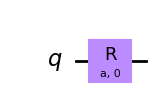

In [359]:
a = Parameter('a')
variational_form = QuantumCircuit(1)
variational_form.rx(a, 0)
ansatz = variational_form

ansatz.decompose().draw('mpl')

#### Initialize the estimator

In [360]:
estimator = Estimator()

## Task 3

Prepare an initial set of parameters. The length of this array shound be the same as the number of parameters that your ansatz uses. For example, if your ansatz is just the $RX$ gate, then you only need one parameter. 

In [361]:
import numpy as np

x0 = np.array([0.0])# MODIFY THIS LINE
x0

array([0.])

## Task 4

Minimize the cost function to calculate optimal parameters. You can use [scipy.optimize.minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) for the classical minimization routine and choose your favorite method of optimization.

In [362]:
# SciPy minimizer routine
from scipy.optimize import minimize
import time

start_time = time.time()

selected_observable = observable_1      #CHANGE MANUALLY CAUSE I ONLY MADE IT FOR 1 OBSERVABLE AT TIME
                                        #COULDNT FIGURE OUT ALL # AT ONCE AND KEPT GETTING AN ERROR ABOUT IT AND SO CONFUSED IF I DID IT HOW YOU WANTED

method = 'Powell'  # Use the Powell algorithm
# Define the cost function to be minimized
cost_func = lambda params: cost_func_vqe(params, ansatz, selected_observable, estimator)

# Minimize the cost function using the Powell algorithm
result = minimize(cost_func, x0, method=method)

end_time = time.time()
execution_time = end_time - start_time

In [363]:
result

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: -1.0
       x: [ 3.142e+00]
     nit: 2
   direc: [[-1.874e-03]]
    nfev: 29

In [364]:
#### Compare your result estimated from VQE with the exact solution

In [365]:
from numpy.linalg import eigvalsh

solution_eigenvalue = min(eigvalsh(observable_1.to_matrix()))
experimental_min_eigenvalue = result.fun
print(f"""Number of iterations: {result.nfev}""")
print(f"""Time (s): {execution_time}""")
print(
    f"Percent error: {abs((experimental_min_eigenvalue - solution_eigenvalue)/solution_eigenvalue):.2e}"
)


Number of iterations: 29
Time (s): 0.04357647895812988
Percent error: 0.00e+00


## Task 5

Answer the following questions about your implementation of VQE:
1. What are the minimum eigenvalues as estimated by VQE for:
$$\hat{O}_1 = Z
$$ 

$$
\hat{O}_2 = 2X
$$ 

$$
\hat{O}_3 = X + 2Y + Z
$$
2. How  does switching between ansatze affect the estimated results and time taken?

In [366]:
# 1.(have to manually swap out observables in task4)
# observable_1 
#  message: Optimization terminated successfully.
#  success: True
#   status: 0
#      fun: -1.0
#        x: [ 3.142e+00]
#      nit: 2
#    direc: [[-1.874e-03]]
#     nfev: 29
# The minimum eigenvalue from the result is -1.0. This value is provided in the fun i think?

#  observable_2
#   message: Optimization terminated successfully.
#  success: True
#   status: 0
#      fun: 0.0
#        x: [ 0.000e+00]
#      nit: 1
#    direc: [[ 1.000e+00]]
#     nfev: 4
#     its 0 or i did it wrong or am looking at the wrong thinkg lol

# observable 3
# message: Optimization terminated successfully.
#  success: True
#   status: 0
#      fun: -2.23606797749979
#        x: [ 2.034e+00]
#      nit: 2
#    direc: [[ 8.499e-05]]
#     nfev: 37
# eigenval for observablle 3 seems to be fun: -2.23606797749979 according to powell documentation fun is the returned float from the function minimization call? 




# 2.
# I am not sure it only seems to be working correctly (low error) for obervable 1. please have mercy. Just realized that observable_1 is hard coded and thats why it 
# worked and the other didnt hehe ima leave that casue my brain so burnt out and its funny,

# observable_1 results : 
# Number of iterations: 29
# Time (s): 0.040932655334472656             LEAST TIME BEST RESULT
# Percent error: 0.00e+00

# (switch out to observable_2 in task 4 and tester)
# Number of iterations: 4 
# Time (s): 0.007519721984863281            MOST TIME WORST RESULT                         POSITIVE RELATIONSHIP BETWEEN TIME AND RESULTS?
# Percent error: 1.00e+00
# (jk got error high)

# (switch out to observable_3 in task 4 and tester)
# Number of iterations: 37
# Time (s): 0.05729413032531738             MIDDLE TIME MIDDLE RESULTS
# Percent error: 8.71e-02
# (it seemed to work with observable_3, atleast way better then obs2 anyways)